In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from datetime import timedelta
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dữ liệu giá vàng

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD/Dataset/gold_price_2018_2024.csv'

df = pd.read_csv(file_path)

df

,Date,Value (USD per troy ounce)
0,2018-01-01,1307.018690
1,2018-01-02,1319.827953
2,2018-01-03,1311.501862
3,2018-01-04,1321.635371
4,2018-01-05,1319.589185
...,...,...
2339,2024-05-28,2353.805161
2340,2024-05-29,2357.459733
2341,2024-05-30,2335.806797
2342,2024-05-31,2346.815711


**Hàm chọn tham số alpha tốt nhất cho mô hình SES**

In [ ]:
def SES(train, test):
  alpha_values = np.arange(0.01, 1.0, 0.01)
  model1 = SimpleExpSmoothing(train)
  test_data = test.copy()
  rmse_scores = {}
  mape_scores = {}
  mae_scores = {}
  for alpha in alpha_values:
    fit1 = model1.fit(smoothing_level = alpha, optimized = False)
    test_data['test_data_forecast'] = fit1.forecast(len(test))
    rmse = calculate_rmse(test, test_data['test_data_forecast'])
    rmse_scores[alpha] = rmse
    mape = calculate_mape(test, test_data['test_data_forecast'])
    mape_scores[alpha] = mape
    mae = calculate_mae(test, test_data['test_data_forecast'])
    mae_scores[alpha] = mae
  best_alpha1 = min(rmse_scores, key=rmse_scores.get)
  print(f'Best alpha for RMSE: {best_alpha1}, RMSE: {rmse_scores[best_alpha1]}')
  best_alpha2 = min(mape_scores, key=mape_scores.get)
  print(f'Best alpha for MAPE: {best_alpha2}, MAPE: {mape_scores[best_alpha2]}')
  best_alpha3 = min(mae_scores, key=mae_scores.get)
  print(f'Best alpha for MAE: {best_alpha3}, MAE: {mae_scores[best_alpha3]}')


Vẽ biểu đồ plot cho dữ liệu

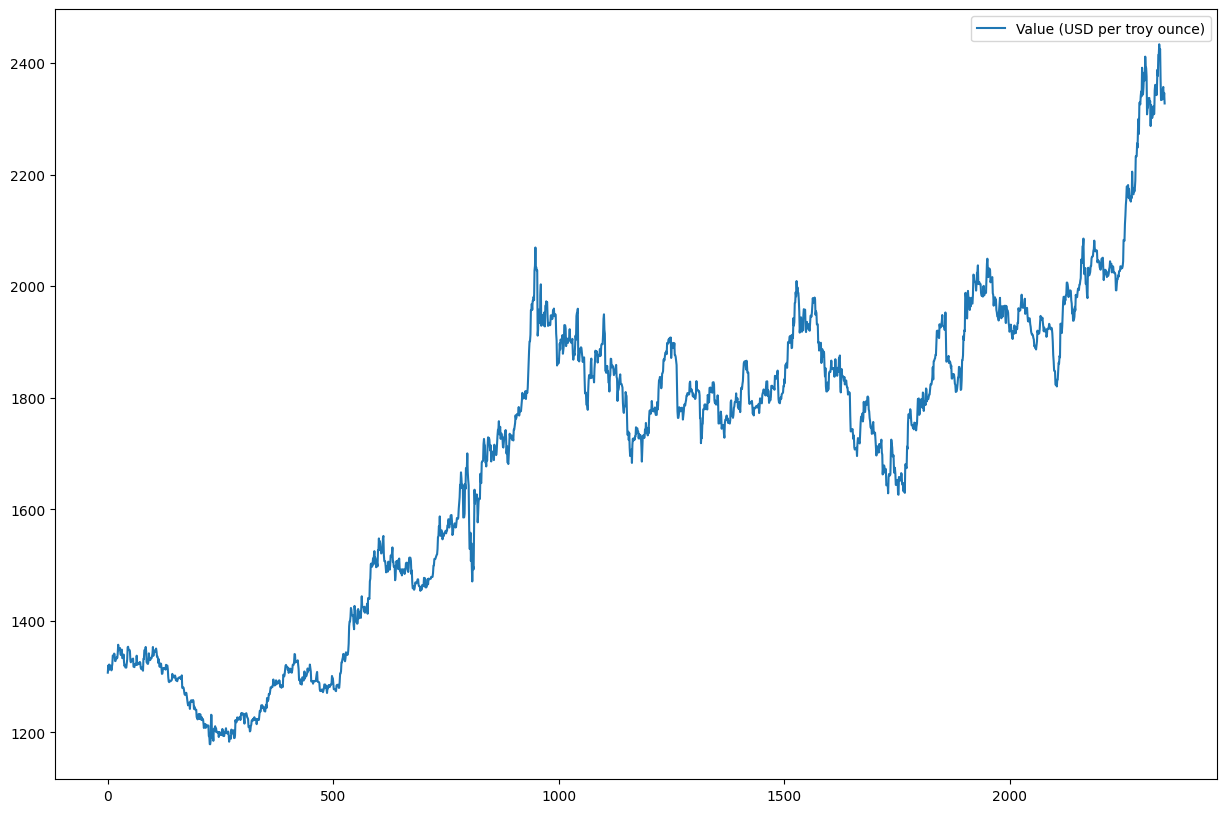

In [ ]:
df.plot(figsize=(15,10))
plt.show()

Thêm index cho dữ liệu

In [ ]:
df.index += 1
df

,Date,Value (USD per troy ounce)
1,2018-01-01,1307.018690
2,2018-01-02,1319.827953
3,2018-01-03,1311.501862
4,2018-01-04,1321.635371
5,2018-01-05,1319.589185
...,...,...
2340,2024-05-28,2353.805161
2341,2024-05-29,2357.459733
2342,2024-05-30,2335.806797
2343,2024-05-31,2346.815711


In [ ]:
# Chuyển đổi kiểu dữ liệu
df['Date'] = pd.to_datetime(df['Date'])
df['Day Number'] = df['Date'].rank(method='dense').astype(int)
df.columns = ['Date', 'Price', 'Day Number']

# Xoá dữ liệu bị null
df = df.dropna()

df

,Date,Price,Day Number
1,2018-01-01,1307.018690,1
2,2018-01-02,1319.827953,2
3,2018-01-03,1311.501862,3
4,2018-01-04,1321.635371,4
5,2018-01-05,1319.589185,5
...,...,...,...
2340,2024-05-28,2353.805161,2340
2341,2024-05-29,2357.459733,2341
2342,2024-05-30,2335.806797,2342
2343,2024-05-31,2346.815711,2343


## Chia dữ liệu train, test 8:2

In [ ]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date        Price  Day Number
 1    2018-01-01  1307.018690           1
 2    2018-01-02  1319.827953           2
 3    2018-01-03  1311.501862           3
 4    2018-01-04  1321.635371           4
 5    2018-01-05  1319.589185           5
 ...         ...          ...         ...
 1871 2023-02-14  1857.564896        1871
 1872 2023-02-15  1834.700124        1872
 1873 2023-02-16  1834.369966        1873
 1874 2023-02-17  1842.319893        1874
 1875 2023-02-18  1841.920150        1875
 
 [1875 rows x 3 columns],
            Date        Price  Day Number
 1876 2023-02-19  1842.564983        1876
 1877 2023-02-20  1841.820072        1877
 1878 2023-02-21  1835.749945        1878
 1879 2023-02-22  1825.069964        1879
 1880 2023-02-23  1823.179983        1880
 ...         ...          ...         ...
 2340 2024-05-28  2353.805161        2340
 2341 2024-05-29  2357.459733        2341
 2342 2024-05-30  2335.806797        2342
 2343 2024-05-31  2346.815711        2343
 2344 

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

In [ ]:
SES(train['Price'], test['Price'])

Best alpha for RMSE: 0.060000000000000005, RMSE: 212.71673049968766
Best alpha for MAPE: 0.060000000000000005, MAPE: 7.55850260276542
Best alpha for MAE: 0.060000000000000005, MAE: 161.5568320395308


Chọn alpha và train model

In [ ]:
alpha = 0.06
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
1876,2023-02-19,1842.564983,1876,1872.203407
1877,2023-02-20,1841.820072,1877,1872.203407
1878,2023-02-21,1835.749945,1878,1872.203407
1879,2023-02-22,1825.069964,1879,1872.203407
1880,2023-02-23,1823.179983,1880,1872.203407
...,...,...,...,...
2340,2024-05-28,2353.805161,2340,1872.203407
2341,2024-05-29,2357.459733,2341,1872.203407
2342,2024-05-30,2335.806797,2342,1872.203407
2343,2024-05-31,2346.815711,2343,1872.203407


In [ ]:
last_day_number =  (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

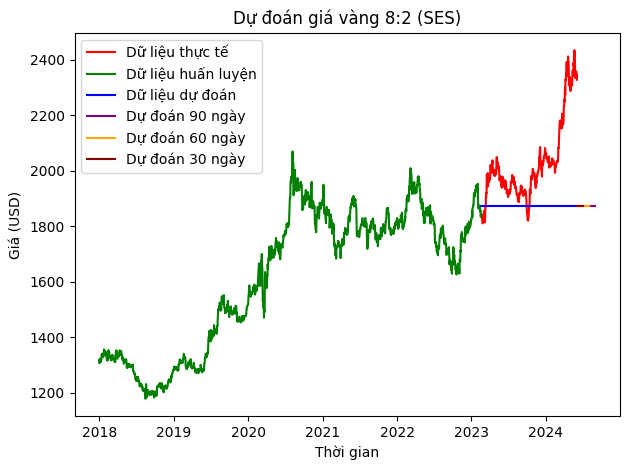

In [ ]:
# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá vàng 8:2 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

Hàm tính RMSE, MAPE, MAE

In [ ]:
def calculate_rmse(actual, forecast):
    return np.sqrt(np.mean((np.array(actual) - np.array(forecast)) ** 2))

def calculate_mape(actual, forecast):
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

def calculate_mae(actual, forecast):
    return np.mean(np.abs(np.array(actual) - np.array(forecast)))

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 212.71673049968786
MAPE: 7.558502602765431%
MAE: 161.55683203953103


## Chia dữ liệu train, test 9:1

In [ ]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size

train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date        Price  Day Number
 1    2018-01-01  1307.018690           1
 2    2018-01-02  1319.827953           2
 3    2018-01-03  1311.501862           3
 4    2018-01-04  1321.635371           4
 5    2018-01-05  1319.589185           5
 ...         ...          ...         ...
 2105 2023-10-06  1820.328813        2105
 2106 2023-10-07  1832.717265        2106
 2107 2023-10-08  1832.775711        2107
 2108 2023-10-09  1848.089962        2108
 2109 2023-10-10  1863.109866        2109
 
 [2109 rows x 3 columns],
            Date        Price  Day Number
 2110 2023-10-11  1861.344017        2110
 2111 2023-10-12  1875.144972        2111
 2112 2023-10-13  1872.550119        2112
 2113 2023-10-14  1932.475070        2113
 2114 2023-10-15  1932.983090        2114
 ...         ...          ...         ...
 2340 2024-05-28  2353.805161        2340
 2341 2024-05-29  2357.459733        2341
 2342 2024-05-30  2335.806797        2342
 2343 2024-05-31  2346.815711        2343
 2344 

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

Chọn hệ số alpha và train model

In [ ]:
alpha = 0.06
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
2110,2023-10-11,1861.344017,2110,1877.820635
2111,2023-10-12,1875.144972,2111,1877.820635
2112,2023-10-13,1872.550119,2112,1877.820635
2113,2023-10-14,1932.475070,2113,1877.820635
2114,2023-10-15,1932.983090,2114,1877.820635
...,...,...,...,...
2340,2024-05-28,2353.805161,2340,1877.820635
2341,2024-05-29,2357.459733,2341,1877.820635
2342,2024-05-30,2335.806797,2342,1877.820635
2343,2024-05-31,2346.815711,2343,1877.820635


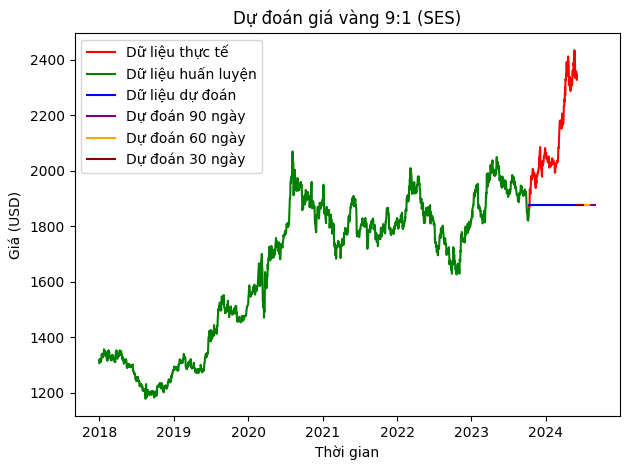

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá vàng 9:1 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 283.3559417340783
MAPE: 10.953348316039355%
MAE: 241.01103073493906


##Chia dữ liệu train, test 7:3

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - test_size
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date        Price  Day Number
 1    2018-01-01  1307.018690           1
 2    2018-01-02  1319.827953           2
 3    2018-01-03  1311.501862           3
 4    2018-01-04  1321.635371           4
 5    2018-01-05  1319.589185           5
 ...         ...          ...         ...
 1636 2022-06-24  1827.229929        1636
 1637 2022-06-25  1827.229929        1637
 1638 2022-06-26  1831.017920        1638
 1639 2022-06-27  1822.849971        1639
 1640 2022-06-28  1818.619940        1640
 
 [1640 rows x 3 columns],
            Date        Price  Day Number
 1641 2022-06-29  1818.419866        1641
 1642 2022-06-30  1805.799940        1642
 1643 2022-07-01  1810.520027        1643
 1644 2022-07-02  1810.520027        1644
 1645 2022-07-03  1809.699919        1645
 ...         ...          ...         ...
 2340 2024-05-28  2353.805161        2340
 2341 2024-05-29  2357.459733        2341
 2342 2024-05-30  2335.806797        2342
 2343 2024-05-31  2346.815711        2343
 2344 

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

Chọn hệ số alpha và train model

In [ ]:
alpha = 0.06
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
1641,2022-06-29,1818.419866,1641,1840.549129
1642,2022-06-30,1805.799940,1642,1840.549129
1643,2022-07-01,1810.520027,1643,1840.549129
1644,2022-07-02,1810.520027,1644,1840.549129
1645,2022-07-03,1809.699919,1645,1840.549129
...,...,...,...,...
2340,2024-05-28,2353.805161,2340,1840.549129
2341,2024-05-29,2357.459733,2341,1840.549129
2342,2024-05-30,2335.806797,2342,1840.549129
2343,2024-05-31,2346.815711,2343,1840.549129


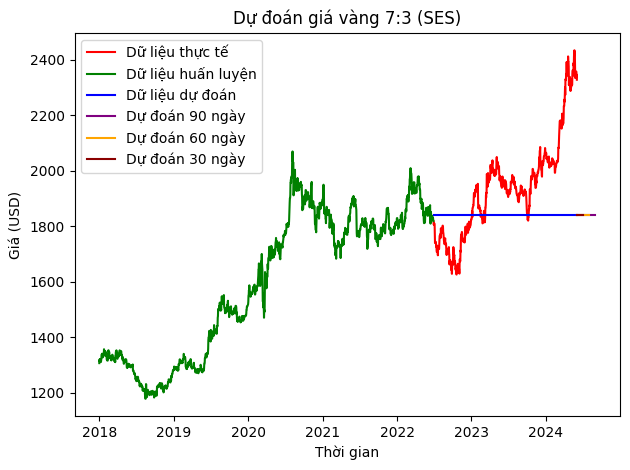

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá vàng 7:3 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 203.92264184281655
MAPE: 7.817056150685834%
MAE: 158.50020021311227


#Dữ liệu giá bạc

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD/Dataset/silver_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

            Date  Value (USD per troy ounce)
0     2018-01-01                   16.993771
1     2018-01-02                   17.196475
2     2018-01-03                   17.112426
3     2018-01-04                   17.200338
4     2018-01-05                   17.220985
...          ...                         ...
2339  2024-05-28                   31.790544
2340  2024-05-29                   31.992130
2341  2024-05-30                   31.825860
2342  2024-05-31                   31.137894
2343  2024-06-01                   30.408189

[2344 rows x 2 columns]


Vẽ biểu đồ plot cho dữ liệu

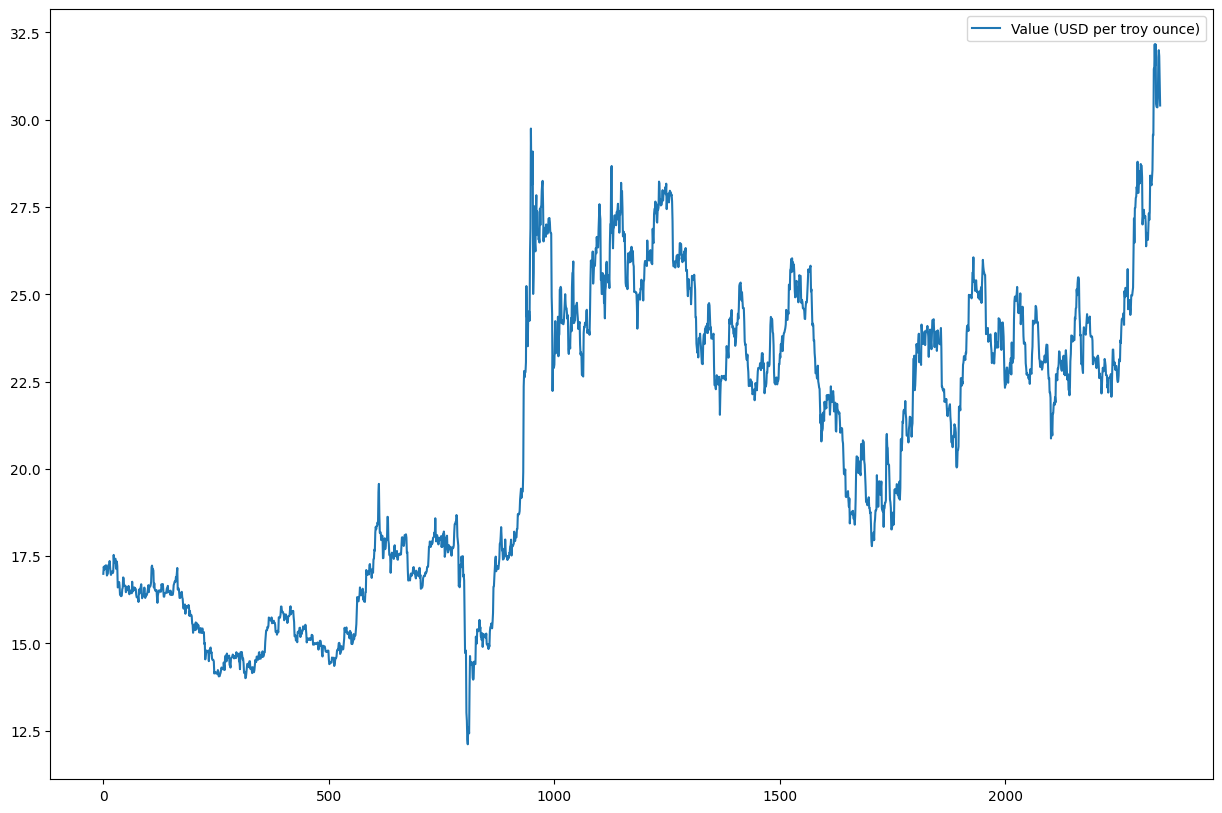

In [ ]:
df.plot(figsize=(15,10))
plt.show()

Thêm index cho dữ liệu

In [ ]:
df.index += 1
df

,Date,Value (USD per troy ounce)
1,2018-01-01,16.993771
2,2018-01-02,17.196475
3,2018-01-03,17.112426
4,2018-01-04,17.200338
5,2018-01-05,17.220985
...,...,...
2340,2024-05-28,31.790544
2341,2024-05-29,31.992130
2342,2024-05-30,31.825860
2343,2024-05-31,31.137894


In [ ]:
# Chuyển đổi kiểu dữ liệu
df['Date'] = pd.to_datetime(df['Date'])
df['Day Number'] = df['Date'].rank(method='dense').astype(int)
df.columns = ['Date', 'Price', 'Day Number']

# Xoá dữ liệu bị null
df = df.dropna()

df

,Date,Price,Day Number
1,2018-01-01,16.993771,1
2,2018-01-02,17.196475,2
3,2018-01-03,17.112426,3
4,2018-01-04,17.200338,4
5,2018-01-05,17.220985,5
...,...,...,...
2340,2024-05-28,31.790544,2340
2341,2024-05-29,31.992130,2341
2342,2024-05-30,31.825860,2342
2343,2024-05-31,31.137894,2343


## Chia dữ liệu train, test 8:2

In [ ]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date      Price  Day Number
 1    2018-01-01  16.993771           1
 2    2018-01-02  17.196475           2
 3    2018-01-03  17.112426           3
 4    2018-01-04  17.200338           4
 5    2018-01-05  17.220985           5
 ...         ...        ...         ...
 1871 2023-02-14  21.739000        1871
 1872 2023-02-15  21.538900        1872
 1873 2023-02-16  21.510000        1873
 1874 2023-02-17  21.714000        1874
 1875 2023-02-18  21.689000        1875
 
 [1875 rows x 3 columns],
            Date      Price  Day Number
 1876 2023-02-19  21.729000        1876
 1877 2023-02-20  21.801000        1877
 1878 2023-02-21  21.851000        1878
 1879 2023-02-22  21.490000        1879
 1880 2023-02-23  21.324200        1880
 ...         ...        ...         ...
 2340 2024-05-28  31.790544        2340
 2341 2024-05-29  31.992130        2341
 2342 2024-05-30  31.825860        2342
 2343 2024-05-31  31.137894        2343
 2344 2024-06-01  30.408189        2344
 
 [469 rows

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

Tín hệ số alpha

In [ ]:
SES(train['Price'], test['Price'])

Best alpha for RMSE: 0.04, RMSE: 2.511623527952974
Best alpha for MAPE: 0.04, MAPE: 6.422040353242842
Best alpha for MAE: 0.04, MAE: 1.6649548273162769


Chọn hệ số alpha và train model

In [ ]:
alpha = 0.04
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
1876,2023-02-19,21.729000,1876,22.748409
1877,2023-02-20,21.801000,1877,22.748409
1878,2023-02-21,21.851000,1878,22.748409
1879,2023-02-22,21.490000,1879,22.748409
1880,2023-02-23,21.324200,1880,22.748409
...,...,...,...,...
2340,2024-05-28,31.790544,2340,22.748409
2341,2024-05-29,31.992130,2341,22.748409
2342,2024-05-30,31.825860,2342,22.748409
2343,2024-05-31,31.137894,2343,22.748409


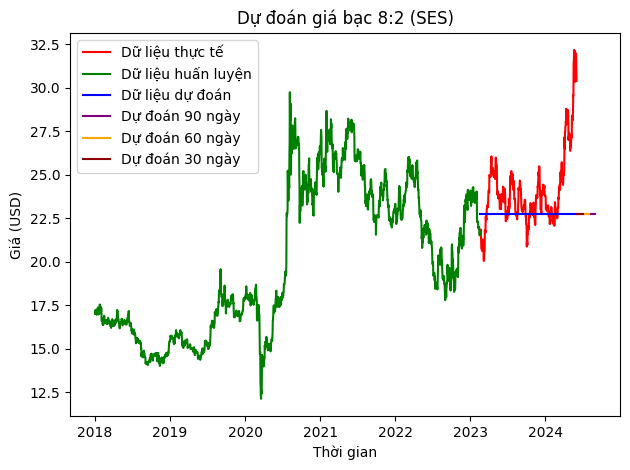

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạc 8:2 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 2.511623527952974
MAPE: 6.422040353242842%
MAE: 1.6649548273162769


## Chia dữ liệu train, test 9:1

In [ ]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date      Price  Day Number
 1    2018-01-01  16.993771           1
 2    2018-01-02  17.196475           2
 3    2018-01-03  17.112426           3
 4    2018-01-04  17.200338           4
 5    2018-01-05  17.220985           5
 ...         ...        ...         ...
 2105 2023-10-06  20.958570        2105
 2106 2023-10-07  21.593354        2106
 2107 2023-10-08  21.593614        2107
 2108 2023-10-09  21.846199        2108
 2109 2023-10-10  21.895097        2109
 
 [2109 rows x 3 columns],
            Date      Price  Day Number
 2110 2023-10-11  21.831991        2110
 2111 2023-10-12  22.049871        2111
 2112 2023-10-13  21.900629        2112
 2113 2023-10-14  22.711553        2113
 2114 2023-10-15  22.711443        2114
 ...         ...        ...         ...
 2340 2024-05-28  31.790544        2340
 2341 2024-05-29  31.992130        2341
 2342 2024-05-30  31.825860        2342
 2343 2024-05-31  31.137894        2343
 2344 2024-06-01  30.408189        2344
 
 [235 rows

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

Chọn hệ số alpha và train model

In [ ]:
alpha = 0.04
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
2110,2023-10-11,21.831991,2110,22.704
2111,2023-10-12,22.049871,2111,22.704
2112,2023-10-13,21.900629,2112,22.704
2113,2023-10-14,22.711553,2113,22.704
2114,2023-10-15,22.711443,2114,22.704
...,...,...,...,...
2340,2024-05-28,31.790544,2340,22.704
2341,2024-05-29,31.992130,2341,22.704
2342,2024-05-30,31.825860,2342,22.704
2343,2024-05-31,31.137894,2343,22.704


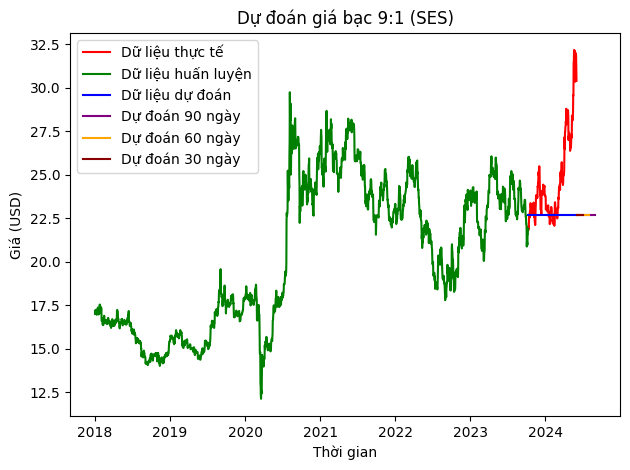

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạc 9:1 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 3.254131001510839
MAPE: 7.860745814091732%
MAE: 2.1491198198327464


## Chia dữ liệu train, test 7:3

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date      Price  Day Number
 1    2018-01-01  16.993771           1
 2    2018-01-02  17.196475           2
 3    2018-01-03  17.112426           3
 4    2018-01-04  17.200338           4
 5    2018-01-05  17.220985           5
 ...         ...        ...         ...
 1636 2022-06-24  21.147500        1636
 1637 2022-06-25  21.147500        1637
 1638 2022-06-26  21.170350        1638
 1639 2022-06-27  21.153000        1639
 1640 2022-06-28  20.812700        1640
 
 [1640 rows x 3 columns],
            Date      Price  Day Number
 1641 2022-06-29  20.725550        1641
 1642 2022-06-30  20.250550        1642
 1643 2022-07-01  19.853000        1643
 1644 2022-07-02  19.844000        1644
 1645 2022-07-03  19.923950        1645
 ...         ...        ...         ...
 2340 2024-05-28  31.790544        2340
 2341 2024-05-29  31.992130        2341
 2342 2024-05-30  31.825860        2342
 2343 2024-05-31  31.137894        2343
 2344 2024-06-01  30.408189        2344
 
 [704 rows

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.04
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
1641,2022-06-29,20.725550,1641,21.85803
1642,2022-06-30,20.250550,1642,21.85803
1643,2022-07-01,19.853000,1643,21.85803
1644,2022-07-02,19.844000,1644,21.85803
1645,2022-07-03,19.923950,1645,21.85803
...,...,...,...,...
2340,2024-05-28,31.790544,2340,21.85803
2341,2024-05-29,31.992130,2341,21.85803
2342,2024-05-30,31.825860,2342,21.85803
2343,2024-05-31,31.137894,2343,21.85803


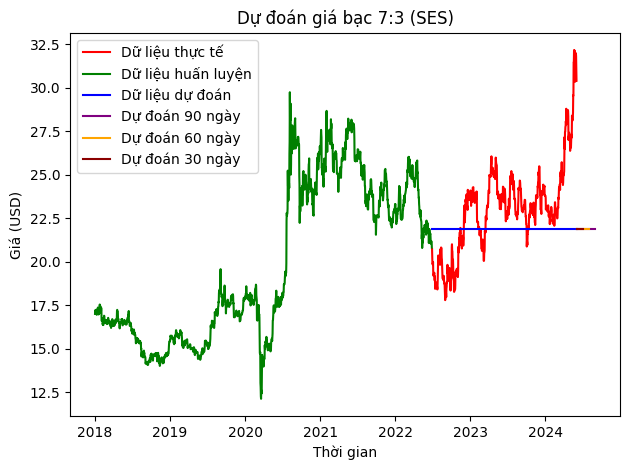

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạc 7:3 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 2.8194648082533735
MAPE: 9.388484829099166%
MAE: 2.223071084078129


#Dữ liệu giá bạch kim

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD/Dataset/platium_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

            Date  Value (USD per troy ounce)
0     2018-01-01                  930.030587
1     2018-01-02                  944.375754
2     2018-01-03                  954.910273
3     2018-01-04                  960.864535
4     2018-01-05                  969.196081
...          ...                         ...
2339  2024-05-28                 1062.333141
2340  2024-05-29                 1063.887962
2341  2024-05-30                 1036.777827
2342  2024-05-31                 1027.966127
2343  2024-06-01                 1009.071350

[2344 rows x 2 columns]


Vẽ biểu đồ plot cho dữ liệu

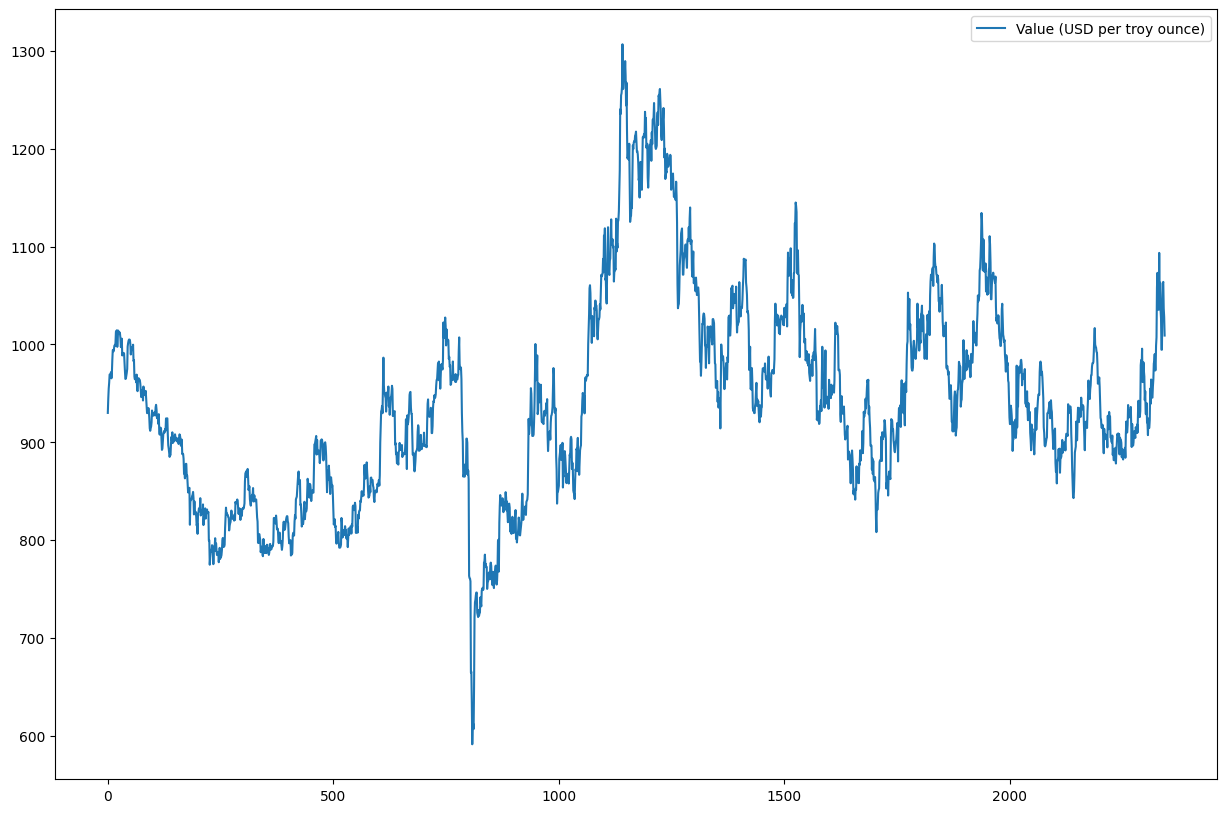

In [ ]:
df.plot(figsize=(15,10))
plt.show()

Thêm index cho dữ liệu

In [ ]:
df.index += 1
df

,Date,Value (USD per troy ounce)
1,2018-01-01,930.030587
2,2018-01-02,944.375754
3,2018-01-03,954.910273
4,2018-01-04,960.864535
5,2018-01-05,969.196081
...,...,...
2340,2024-05-28,1062.333141
2341,2024-05-29,1063.887962
2342,2024-05-30,1036.777827
2343,2024-05-31,1027.966127


In [ ]:
# Chuyển đổi kiểu dữ liệu
df['Date'] = pd.to_datetime(df['Date'])
df['Day Number'] = df['Date'].rank(method='dense').astype(int)
df.columns = ['Date', 'Price', 'Day Number']

# Xoá dữ liệu bị null
df = df.dropna()

df

,Date,Price,Day Number
1,2018-01-01,930.030587,1
2,2018-01-02,944.375754,2
3,2018-01-03,954.910273,3
4,2018-01-04,960.864535,4
5,2018-01-05,969.196081,5
...,...,...,...
2340,2024-05-28,1062.333141,2340
2341,2024-05-29,1063.887962,2341
2342,2024-05-30,1036.777827,2342
2343,2024-05-31,1027.966127,2343


## Chia dữ liệu train, test 8:2

In [ ]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date       Price  Day Number
 1    2018-01-01  930.030587           1
 2    2018-01-02  944.375754           2
 3    2018-01-03  954.910273           3
 4    2018-01-04  960.864535           4
 5    2018-01-05  969.196081           5
 ...         ...         ...         ...
 1871 2023-02-14  945.905016        1871
 1872 2023-02-15  920.919959        1872
 1873 2023-02-16  921.000025        1873
 1874 2023-02-17  911.209969        1874
 1875 2023-02-18  919.653971        1875
 
 [1875 rows x 3 columns],
            Date        Price  Day Number
 1876 2023-02-19   911.209969        1876
 1877 2023-02-20   928.480020        1877
 1878 2023-02-21   946.385017        1878
 1879 2023-02-22   951.955021        1879
 1880 2023-02-23   948.520024        1880
 ...         ...          ...         ...
 2340 2024-05-28  1062.333141        2340
 2341 2024-05-29  1063.887962        2341
 2342 2024-05-30  1036.777827        2342
 2343 2024-05-31  1027.966127        2343
 2344 2024-06-01  

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

**Tìm hệ số alpha tối ưu nhất cho dữ liệu**

In [ ]:
SES(train['Price'], test['Price'])

Best alpha for RMSE: 0.11, RMSE: 56.76694560380568
Best alpha for MAPE: 0.2, MAPE: 4.523087782780023
Best alpha for MAE: 0.18000000000000002, MAE: 44.54897937923375


Chọn hệ số alpha và train model

In [ ]:
alpha = 0.2
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
1876,2023-02-19,911.209969,1876,934.816259
1877,2023-02-20,928.480020,1877,934.816259
1878,2023-02-21,946.385017,1878,934.816259
1879,2023-02-22,951.955021,1879,934.816259
1880,2023-02-23,948.520024,1880,934.816259
...,...,...,...,...
2340,2024-05-28,1062.333141,2340,934.816259
2341,2024-05-29,1063.887962,2341,934.816259
2342,2024-05-30,1036.777827,2342,934.816259
2343,2024-05-31,1027.966127,2343,934.816259


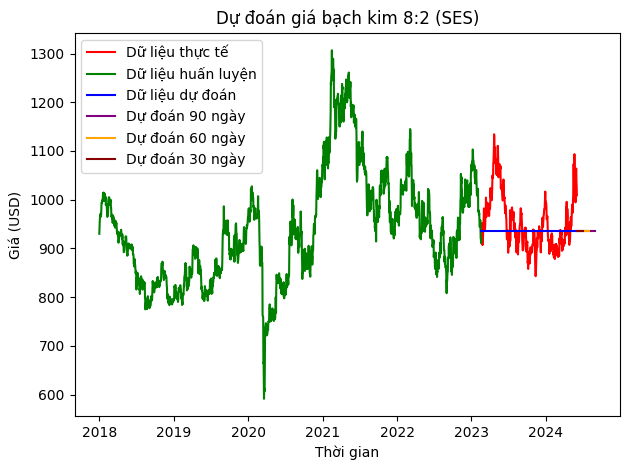

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạch kim 8:2 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 59.723159023826334
MAPE: 4.523087782780023%
MAE: 44.61236780777193


## Chia dữ liệu train, test 9:1

In [ ]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date       Price  Day Number
 1    2018-01-01  930.030587           1
 2    2018-01-02  944.375754           2
 3    2018-01-03  954.910273           3
 4    2018-01-04  960.864535           4
 5    2018-01-05  969.196081           5
 ...         ...         ...         ...
 2105 2023-10-06  858.004833        2105
 2106 2023-10-07  881.534385        2106
 2107 2023-10-08  881.398801        2107
 2108 2023-10-09  884.817783        2108
 2109 2023-10-10  893.028493        2109
 
 [2109 rows x 3 columns],
            Date        Price  Day Number
 2110 2023-10-11   885.227509        2110
 2111 2023-10-12   893.530162        2111
 2112 2023-10-13   868.918591        2112
 2113 2023-10-14   883.605634        2113
 2114 2023-10-15   883.889531        2114
 ...         ...          ...         ...
 2340 2024-05-28  1062.333141        2340
 2341 2024-05-29  1063.887962        2341
 2342 2024-05-30  1036.777827        2342
 2343 2024-05-31  1027.966127        2343
 2344 2024-06-01  

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

Chọn hệ số alpha và train model

In [ ]:
alpha = 0.2
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
2110,2023-10-11,885.227509,2110,886.749631
2111,2023-10-12,893.530162,2111,886.749631
2112,2023-10-13,868.918591,2112,886.749631
2113,2023-10-14,883.605634,2113,886.749631
2114,2023-10-15,883.889531,2114,886.749631
...,...,...,...,...
2340,2024-05-28,1062.333141,2340,886.749631
2341,2024-05-29,1063.887962,2341,886.749631
2342,2024-05-30,1036.777827,2342,886.749631
2343,2024-05-31,1027.966127,2343,886.749631


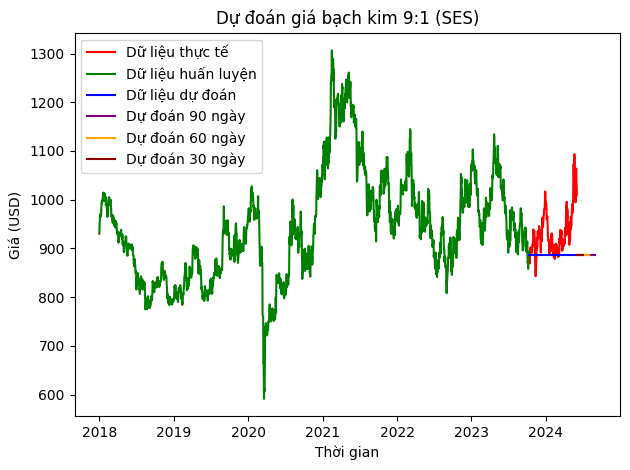

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạch kim 9:1 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 65.11397825723274
MAPE: 5.024584752243711%
MAE: 48.72115883345758


## Chia dữ liệu train, test 7:3

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size

train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train, test

(           Date       Price  Day Number
 1    2018-01-01  930.030587           1
 2    2018-01-02  944.375754           2
 3    2018-01-03  954.910273           3
 4    2018-01-04  960.864535           4
 5    2018-01-05  969.196081           5
 ...         ...         ...         ...
 1636 2022-06-24  902.920025        1636
 1637 2022-06-25  908.030000        1637
 1638 2022-06-26  908.920032        1638
 1639 2022-06-27  908.369994        1639
 1640 2022-06-28  914.319988        1640
 
 [1640 rows x 3 columns],
            Date        Price  Day Number
 1641 2022-06-29   916.869967        1641
 1642 2022-06-30   882.411985        1642
 1643 2022-07-01   889.170025        1643
 1644 2022-07-02   890.600028        1644
 1645 2022-07-03   888.359979        1645
 ...         ...          ...         ...
 2340 2024-05-28  1062.333141        2340
 2341 2024-05-29  1063.887962        2341
 2342 2024-05-30  1036.777827        2342
 2343 2024-05-31  1027.966127        2343
 2344 2024-06-01  

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train['Price'])

Chọn hệ số alpha và train model

In [ ]:
alpha = 0.2
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['Price Predict'] = fit.forecast(len(test))
test_data

,Date,Price,Day Number,Price Predict
1641,2022-06-29,916.869967,1641,916.593285
1642,2022-06-30,882.411985,1642,916.593285
1643,2022-07-01,889.170025,1643,916.593285
1644,2022-07-02,890.600028,1644,916.593285
1645,2022-07-03,888.359979,1645,916.593285
...,...,...,...,...
2340,2024-05-28,1062.333141,2340,916.593285
2341,2024-05-29,1063.887962,2341,916.593285
2342,2024-05-30,1036.777827,2342,916.593285
2343,2024-05-31,1027.966127,2343,916.593285


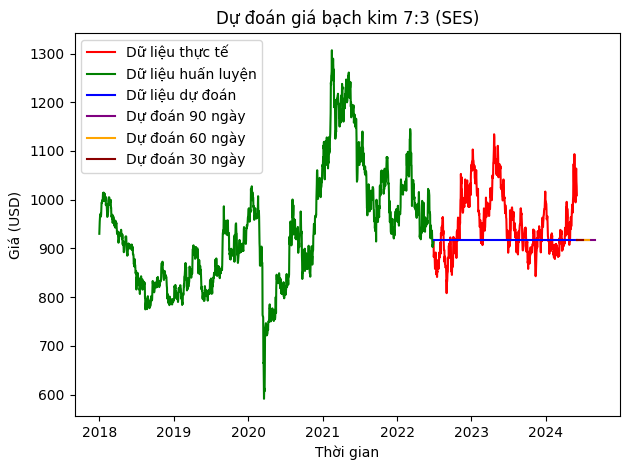

In [ ]:
last_day_number = (df['Day Number'].max())
last_date = (df['Date'].iloc[-1])

# Dự đoán 90 ngày tiếp theo
n_forecasts = 90
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_forecasts)
future_day_numbers = range(last_day_number + 1, last_day_number + 1 + n_forecasts)

future_data = pd.DataFrame({'Date': future_dates, 'Day Number': future_day_numbers})
predict_results = fit.forecast(steps=(len(test_data) + len(future_dates)))[-n_forecasts:]
predict_results = np.array(predict_results, dtype=float)
future_data['Price Predict'] = predict_results

# Trực quan hóa kết quả
plt.plot(test_data['Date'], test_data['Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train['Date'], train['Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data['Date'], future_data['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data['Date'].iloc[0:60], future_data['Price Predict'].iloc[0:60], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data['Date'].iloc[0:30], future_data['Price Predict'].iloc[0:30], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạch kim 7:3 (SES)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
actual = test['Price']
forecast = test_data['Price Predict']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 71.11071581134988
MAPE: 5.37780464812974%
MAE: 53.30717396864981
